# Multiple Linear Regression (MLR)

### Overview
We start with the basic multiple linear regression model:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon $$

**Example context**: 
- **y**: Test score of students
- **x1**: GPA of students
- **x2**: Gender (binary: 0 for male, 1 for female)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Create toy dataset
np.random.seed(42)
n = 100
GPA = np.random.uniform(2.0, 4.0, n)
Female = np.random.choice([0, 1], n)
TestScore = 50 + 5 * GPA + 10 * Female + np.random.normal(0, 5, n)
StudentID = np.arange(1, n + 1)

data = pd.DataFrame({'StudentID': StudentID, 'GPA': GPA, 'Female': Female, 'TestScore': TestScore})

data

,StudentID,GPA,Female,TestScore
0,1,2.749080,0,62.783596
1,2,3.901429,1,81.014880
2,3,3.463988,0,67.146381
3,4,3.197317,0,60.143195
4,5,2.312037,1,77.274300
...,...,...,...,...
95,96,2.987591,1,94.201613
96,97,3.045466,1,78.081781
97,98,2.855082,0,69.953238
98,99,2.050838,0,65.024200


In [2]:
# Fit MLR model
X = sm.add_constant(data[['GPA', 'Female']])
model = sm.OLS(data['TestScore'], X).fit()

# Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              TestScore   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     84.41
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           5.82e-22
Time:                        00:43:43   Log-Likelihood:                -299.84
No. Observations:                 100   AIC:                             605.7
Df Residuals:                      97   BIC:                             613.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6510      2.554     19.439      0.0

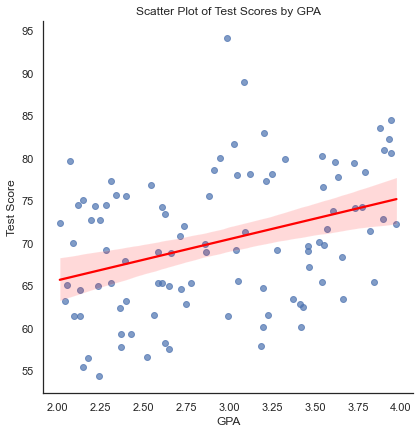

In [3]:
sns.set(style="white")

sns.lmplot(data=data, x='GPA', y='TestScore', height=6, aspect=1, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

plt.title('Scatter Plot of Test Scores by GPA')
plt.xlabel('GPA')
plt.ylabel('Test Score')

# Show the plot
plt.show()

# Interaction
Let's add an interaction term between GPA and gender:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3(x_1 \cdot x_2) + \epsilon $$

In [4]:
# Create interaction term
data['GPAxFemale'] = data['GPA'] * data['Female']

# Fit model with interaction
X_interact = sm.add_constant(data[['GPA', 'Female', 'GPAxFemale']])
model_interact = sm.OLS(data['TestScore'], X_interact).fit()

# Show interaction model summary
print(model_interact.summary())


                            OLS Regression Results                            
Dep. Variable:              TestScore   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     56.50
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.95e-21
Time:                        00:43:43   Log-Likelihood:                -299.38
No. Observations:                 100   AIC:                             606.8
Df Residuals:                      96   BIC:                             617.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.2742      3.603     13.122      0.0

Text(28.46242592592592, 0.5, 'Test Score')

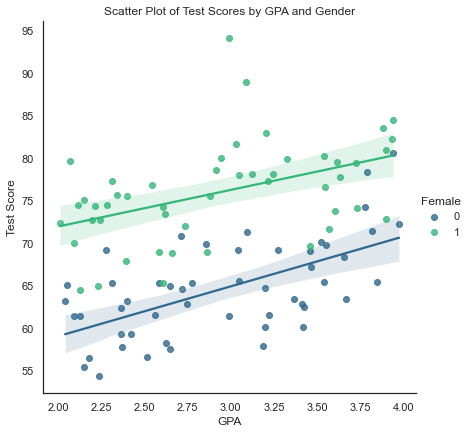

In [5]:
sns.set(style="white")

# Create a scatter plot with linear fits for each gender
sns.lmplot(data=data, x='GPA', y='TestScore', hue='Female', palette='viridis', height=6, aspect=1)

# Add titles and labels using `plt` directly after `sns.lmplot()`
plt.title('Scatter Plot of Test Scores by GPA and Gender')
plt.xlabel('GPA')
plt.ylabel('Test Score')

In [6]:
np.random.seed(42)

# Create dataset
n = 100
GPA = np.random.uniform(2.0, 4.0, n)
Female = np.random.choice([0, 1], n)

TestScore = 50 + 2 * GPA + 5 * Female + 8 * GPA * Female + np.random.normal(0, 5, n)

# Create DataFrame
data = pd.DataFrame({'StudentID': StudentID, 'GPA': GPA, 'Female': Female, 'TestScore': TestScore})

# Add interaction term
data['GPA_Female'] = data['GPA'] * data['Female']

# Fit the model with interaction
X = sm.add_constant(data[['GPA', 'Female', 'GPA_Female']])
model = sm.OLS(data['TestScore'], X).fit()

# Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              TestScore   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     327.8
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.70e-50
Time:                        00:43:44   Log-Likelihood:                -299.38
No. Observations:                 100   AIC:                             606.8
Df Residuals:                      96   BIC:                             617.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.2742      3.603     13.122      0.0

Text(29.154324074074076, 0.5, 'Test Score')

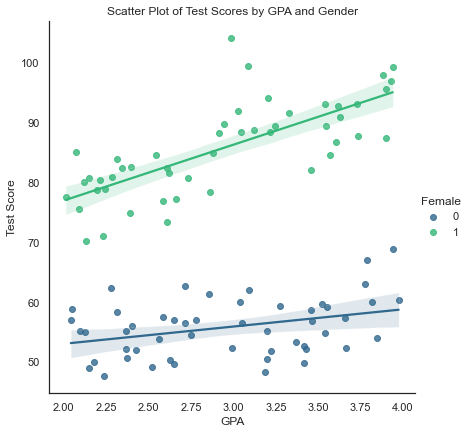

In [7]:
sns.set(style="white")

# Create a scatter plot with linear fits for each gender
sns.lmplot(data=data, x='GPA', y='TestScore', hue='Female', palette='viridis', height=6, aspect=1)

# Add titles and labels using `plt` directly after `sns.lmplot()`
plt.title('Scatter Plot of Test Scores by GPA and Gender')
plt.xlabel('GPA')
plt.ylabel('Test Score')

In [8]:
# How to output reg output: I like to use Latex
# Markdown is an option too.

# Model 1
X = sm.add_constant(data[['GPA']])
model1 = sm.OLS(data['TestScore'], X).fit()
summary1 = model1.summary()

# Model 2
X = sm.add_constant(data[['GPA', 'Female']])
model2 = sm.OLS(data['TestScore'], X).fit()
summary2 = model2.summary()


variables = ['const', 'GPA', 'Female']
rows = []
for var in variables:
    coefs1 = f"{model1.params[var]:.4f}" if var in model1.params else ''
    ses1 = f"({model1.bse[var]:.4f})" if var in model1.bse else ''
    coefs2 = f"{model2.params[var]:.4f}" if var in model2.params else ''
    ses2 = f"({model2.bse[var]:.4f})" if var in model2.bse else ''
    
    rows.append([var, coefs1, coefs2])
    rows.append(['', ses1, ses2]) # '' bcs SEs

# Add a row for the sample size
rows.append(['Sample Size', f"n={int(model1.nobs)}", f"n={int(model2.nobs)}"])

# Create a DataFrame from the list of lists
results = pd.DataFrame(rows, columns=['Variable', '(1)', '(2)'])

# Convert to LaTeX and display
latex_table = results.to_latex(
    index=False,
    header=True,
    escape=False,
    column_format="l@{\hspace{2cm}}cc"
)

latex_table = latex_table.replace('Sample Size', '\\hline\nSample Size')
latex_table = latex_table.replace('Sample Size', '')

print(latex_table)

\begin{tabular}{l@{\hspace{2cm}}cc}
\toprule
   Variable &      (1) &      (2) \\
\midrule
      const &  53.9329 &  37.4650 \\
            & (8.1148) & (2.7332) \\
        GPA &   5.5936 &   6.1986 \\
            & (2.7055) & (0.8908) \\
     Female &          &  29.9773 \\
            &          & (1.0549) \\
\hline
 &    n=100 &    n=100 \\
\bottomrule
\end{tabular}



# More categorical vars?

$$
y = \beta_0 + \beta_1 \text{GPA} + \beta_2 \text{Female} + \beta_3 \text{Midwest} + \beta_4 \text{South} + \beta_5 \text{West} + \epsilon
$$

**Example context**:
- **y**: Test score of students
- **GPA**: Grade point average of students
- **Female**: Gender (binary: 0 for male, 1 for female)
- **Midwest, South, West**: Dummy variables for regions (Northeast is the reference category)
- **ε**: Error term



In [9]:
# Create toy dataset
np.random.seed(42)
n = 100
GPA = np.random.uniform(2.0, 4.0, n)
Female = np.random.choice([0, 1], n)
TestScore = 50 + 5 * GPA + 10 * Female + np.random.normal(0, 5, n)
StudentID = np.arange(1, n + 1)

data = pd.DataFrame({'StudentID': StudentID, 'GPA': GPA, 'Female': Female, 'TestScore': TestScore})

regions = ['Northeast', 'Midwest', 'South', 'West']
data['Region'] = np.random.choice(regions, n)

TestScore += np.where(data['Region'] == 'South', np.random.normal(-3, 1, n), 0)

data['TestScore'] = TestScore

# Create dummy variables
dummies = pd.get_dummies(data['Region'])
data = pd.concat([data, dummies], axis=1)
data

,StudentID,GPA,Female,TestScore,Region,Midwest,Northeast,South,West
0,1,2.749080,0,62.783596,West,0,0,0,1
1,2,3.901429,1,77.307210,South,0,0,1,0
2,3,3.463988,0,64.590200,South,0,0,1,0
3,4,3.197317,0,57.917829,South,0,0,1,0
4,5,2.312037,1,77.274300,West,0,0,0,1
...,...,...,...,...,...,...,...,...,...
95,96,2.987591,1,94.201613,Northeast,0,1,0,0
96,97,3.045466,1,75.939440,South,0,0,1,0
97,98,2.855082,0,66.793300,South,0,0,1,0
98,99,2.050838,0,65.024200,West,0,0,0,1


In [10]:
X = sm.add_constant(data[['GPA', 'Female', 'Midwest', 'South', 'West']])
model = sm.OLS(data['TestScore'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              TestScore   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     36.51
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.29e-20
Time:                        00:43:44   Log-Likelihood:                -298.70
No. Observations:                 100   AIC:                             609.4
Df Residuals:                      94   BIC:                             625.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9634      2.662     18.769      0.0

# Panel Data?

$$
\text{TestScore}_{ik} = \beta_0 + \beta_1 \cdot \text{GPA}_{i} + \beta_2 \cdot \text{Female}_{i} + \sum_{j=1}^{n} \beta_{j+2} \cdot \text{StudentID}_{i} + \sum_{k=1}^{m} \beta_{k+n} \cdot \text{CourseName}_{k} + \epsilon_{ik}
$$

**Where:**
- **TestScore**: The test score of student \(i\) in course \(k\).
- **GPA**: The grade point average of student \(i\) (not varying by course).
- **Female**: Gender of student \(i\) (binary: 0 for male, 1 for female).
- **StudentID**: Dummy variables representing the fixed effects for each of the *n* students.
- **CourseName**: Dummy variables representing the fixed effects for each of the *m* courses (e.g., MATH170, DATA180, ECON101, PHIL101).
- **$\beta_0$**: Intercept of the regression model.
- **$\beta_1, \beta_2, \ldots$**: Coefficients for the respective variables.
- **$\epsilon_{ik}$**: Error term for student \(i\) in course \(k\).


In [11]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of students and courses
num_students = 100
num_courses = 4

# Create StudentID and CourseName columns
data = pd.DataFrame({'StudentID': np.repeat(np.arange(1, num_students + 1), num_courses)})
courses = ['MATH170', 'DATA180', 'ECON101', 'PHIL101']
data['CourseName'] = np.tile(courses, num_students)

# Generate consistent GPA and Female columns for each student
gpa_per_student = np.random.uniform(2.0, 4.0, num_students)
female_per_student = np.random.choice([0, 1], num_students)

# Repeat GPA and Female for each course entry
data['GPA'] = np.repeat(gpa_per_student, num_courses)
data['Female'] = np.repeat(female_per_student, num_courses)

# Generate test scores for each student in each course
data['TestScore'] = 50 + 5 * data['GPA'] + 10 * data['Female'] + np.random.normal(0, 5, len(data))

# Apply a random penalty to MATH170 scores
math170_penalty = np.random.normal(-5, 2, len(data[data['CourseName'] == 'MATH170']))
data.loc[data['CourseName'] == 'MATH170', 'TestScore'] += math170_penalty

# Display the first few rows of the DataFrame
data

,StudentID,CourseName,GPA,Female,TestScore
0,1,MATH170,2.749080,0,56.630054
1,1,DATA180,2.749080,0,65.253138
2,1,ECON101,2.749080,0,63.571842
3,1,PHIL101,2.749080,0,57.902011
4,2,MATH170,3.901429,1,81.732040
...,...,...,...,...,...
395,99,PHIL101,2.050838,0,56.099441
396,100,MATH170,2.215783,1,65.180220
397,100,DATA180,2.215783,1,70.827724
398,100,ECON101,2.215783,1,69.884174


In [12]:
# Create dummy variables for the fixed effects (StudentID)
X = pd.get_dummies(data['StudentID'], drop_first=True)
# Add other variables (GPA, Female, and CourseName dummies)
X['GPA'] = data['GPA']
X['Female'] = data['Female']
course_dummies = pd.get_dummies(data['CourseName'], drop_first=True)
X = pd.concat([X, course_dummies], axis=1)

# Fit the model
X = sm.add_constant(X)
y = data['TestScore']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              TestScore   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     6.273
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.49e-35
Time:                        00:43:44   Log-Likelihood:                -1171.0
No. Observations:                 400   AIC:                             2548.
Df Residuals:                     297   BIC:                             2959.
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9030      4.001      9.473      0.0

In [13]:
# Model 1: Using only GPA
X = sm.add_constant(data[['GPA']])
X['Female'] = data['Female']
model1 = sm.OLS(data['TestScore'], X).fit()

# Model 2: Using GPA and student fixed effects (dummies for StudentID)
X = pd.get_dummies(data['StudentID'], drop_first=True)
X['GPA'] = data['GPA']
X['Female'] = data['Female']
X = sm.add_constant(X)
model2 = sm.OLS(data['TestScore'], X).fit()

# Model 3: Using GPA and course fixed effects (dummies for CourseName)
X = pd.get_dummies(data['CourseName'], drop_first=True)
X['GPA'] = data['GPA']
X['Female'] = data['Female']
X = sm.add_constant(X)
model3 = sm.OLS(data['TestScore'], X).fit()

# List of variables to include in the table
variables = ['const', 'GPA', 'Female']

n_students = int(len(data.StudentID.unique()))
n_courses = int(len(data.CourseName.unique()))

# Filter the variables to ensure only relevant ones are shown
rows = []
for var in variables:
    coefs1 = f"{model1.params[var]:.4f}" if var in model1.params else ''
    ses1 = f"({model1.bse[var]:.4f})" if var in model1.bse else ''
    
    coefs2 = f"{model2.params[var]:.4f}" if var in model2.params else ''
    ses2 = f"({model2.bse[var]:.4f})" if var in model2.bse else ''
    
    coefs3 = f"{model3.params[var]:.4f}" if var in model3.params else ''
    ses3 = f"({model3.bse[var]:.4f})" if var in model3.bse else ''
    
    rows.append([var, coefs1, coefs2, coefs3])
    rows.append(['', ses1, ses2, ses3])  # Standard errors go in a separate row

# Add a row for the sample size
rows.append(['Sample Size', f"n={int(model1.nobs)}", f"n={int(model2.nobs)}", f"n={int(model3.nobs)}"])
rows.append(['\# of Students', f"{n_students}", f"{n_students}", f"{n_students}"])
rows.append(['\# of Courses', f"{n_courses}", f"{n_courses}", f"{n_courses}"])
rows.append(['Student FEs','$-$','$+$','$+$'])
rows.append(['Course FEs','$-$','$-$','$+$'])

# Add R-squared values
rows.append(['R-squared', f"{model1.rsquared:.4f}", f"{model2.rsquared:.4f}", f"{model3.rsquared:.4f}"])

# Create a DataFrame from the list of lists
results = pd.DataFrame(rows, columns=['Variable', '(1)', '(2)', '(3)'])

# Convert to LaTeX with custom formatting
latex_table = results.to_latex(
    index=False,
    header=True,
    escape=False,
    column_format="l@{\hspace{2cm}}ccc"
)

# Add a final \hline before the sample size
latex_table = latex_table.replace('Sample Size', '\hline\nSample Size')

In [14]:
print(latex_table)

\begin{tabular}{l@{\hspace{2cm}}ccc}
\toprule
      Variable &      (1) &      (2) &      (3) \\
\midrule
         const &  47.2775 &  37.0110 &  48.3460 \\
               & (1.4499) & (4.4240) & (1.4048) \\
           GPA &   5.5982 &   8.6677 &   5.5982 \\
               & (0.4726) & (0.6346) & (0.4343) \\
        Female &   9.6306 &  10.6978 &   9.6306 \\
               & (0.5596) & (2.7985) & (0.5143) \\
   \hline
Sample Size &    n=400 &    n=400 &    n=400 \\
\# of Students &      100 &      100 &      100 \\
 \# of Courses &        4 &        4 &        4 \\
   Student FEs &      $-$ &      $+$ &      $+$ \\
    Course FEs &      $-$ &      $-$ &      $+$ \\
     R-squared &   0.5182 &   0.6050 &   0.5962 \\
\bottomrule
\end{tabular}



In [15]:
X = sm.add_constant(data[['GPA']])
X['Female'] = data['Female']
model0 = sm.OLS(data['TestScore'], X).fit(cov_type='HC3')
model1 = sm.OLS(data['TestScore'], X).fit(cov_type='HC3')  # Robust SEs from White, 1980.
model2 = sm.OLS(data['TestScore'], X).fit(cov_type='cluster', \
                                    cov_kwds={'groups': data['StudentID']}) # clustered at Student lvl, Cameron & Miller, 2015.
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              TestScore   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     207.1
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.45e-62
Time:                        00:43:44   Log-Likelihood:                -1254.7
No. Observations:                 400   AIC:                             2515.
Df Residuals:                     397   BIC:                             2527.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.2775      1.444     32.739      0.0

# Non-linear (parametric) fit?

$$
\text{TestScore}_i = \beta_0 + \beta_1 \cdot \text{GPA}_i + \beta_2 \cdot \text{GPA}_i^2 + \beta_3 \cdot \text{Female}_i + \epsilon_i
$$

**Where:**
- **$\text{TestScore}_i$**: The predicted test score for student \(i\).
- **$\text{GPA}_i$**: The grade point average of student \(i\).
- **$\text{GPA}_i^2$**: The square of the GPA of student \(i\).
- **$\text{Female}_i$**: A binary variable indicating the gender of student \(i\) (0 for male, 1 for female).
- **$\beta_0$**: The intercept of the regression model.
- **$\beta_1$**: The coefficient for the linear term of GPA.
- **$\beta_2$**: The coefficient for the quadratic term of GPA.
- **$\beta_3$**: The coefficient for the Female variable.
- **$\epsilon_i$**: The error term for student \(i\).


In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Create toy dataset
np.random.seed(42)
n = 100
GPA = np.random.uniform(2.0, 4.0, n)
Female = np.random.choice([0, 1], n)

# Create a test score formula that increases rapidly and then flattens out
# Use a positive linear term and a negative quadratic term
TestScore = -10 + 120 * (GPA - 2) - 40 * (GPA - 2) ** 2 + 10 * Female + np.random.normal(0, 5, n)
StudentID = np.arange(1, n + 1)
data = pd.DataFrame({'StudentID': StudentID, 'GPA': GPA, 'Female': Female, 'TestScore': TestScore})

data

,StudentID,GPA,Female,TestScore
0,1,2.749080,0,56.482976
1,2,3.901429,1,85.061939
2,3,3.463988,0,79.774566
3,4,3.197317,0,70.491929
4,5,2.312037,1,39.263897
...,...,...,...,...
95,96,2.987591,1,98.761146
96,97,3.045466,1,84.590394
97,98,2.855082,0,69.041061
98,99,2.050838,0,0.767218


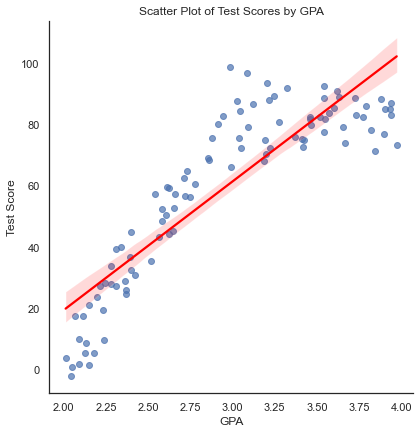

In [17]:
sns.set(style="white")
sns.lmplot(data=data, x='GPA', y='TestScore', height=6, aspect=1, 
           scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

# Add a title and labels
plt.title('Scatter Plot of Test Scores by GPA')
plt.xlabel('GPA')
plt.ylabel('Test Score')

# Show the plot
plt.show()

In [18]:
# Model 1
X = sm.add_constant(data[['GPA', 'Female']])
y = data['TestScore']
model1 = sm.OLS(y, X).fit()
print("OLS Regression Results:")
print(model1.summary())

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:              TestScore   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     200.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.61e-35
Time:                        00:43:45   Log-Likelihood:                -394.20
No. Observations:                 100   AIC:                             794.4
Df Residuals:                      97   BIC:                             802.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9320      6

In [19]:
# Model 2 (quadratic)
data['GPA_squared'] = data['GPA'] ** 2
X = sm.add_constant(data[['GPA', 'GPA_squared', 'Female']])
y = data['TestScore']
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              TestScore   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1056.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.43e-73
Time:                        00:43:45   Log-Likelihood:                -299.66
No. Observations:                 100   AIC:                             607.3
Df Residuals:                      96   BIC:                             617.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -401.9694     14.517    -27.690      

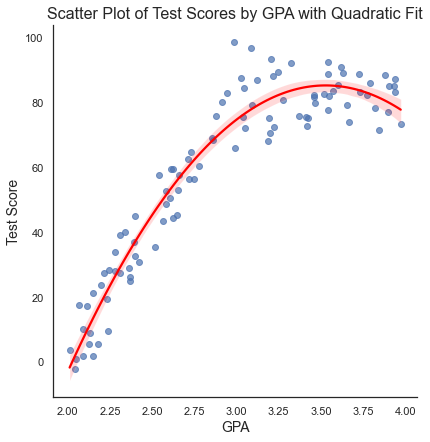

In [20]:
sns.set(style="white")

# Create a lmplot for the quadratic fit
lm = sns.lmplot(data=data, x='GPA', y='TestScore', height=6, aspect=1, 
                scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'}, order=2)

# Customize the axes
lm.ax.set_title('Scatter Plot of Test Scores by GPA with Quadratic Fit', fontsize=16)
lm.ax.set_xlabel('GPA', fontsize=14)
lm.ax.set_ylabel('Test Score', fontsize=14)


# Show the plot
plt.show()

In [21]:
# Model 3 (cube)?
data['GPA_squared'] = data['GPA'] ** 2
data['GPA_cube'] = data['GPA'] ** 3
X = sm.add_constant(data[['GPA', 'GPA_squared', 'GPA_cube', 'Female']])
y = data['TestScore']
model3 = sm.OLS(y, X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              TestScore   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     785.0
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           7.85e-72
Time:                        00:43:45   Log-Likelihood:                -299.56
No. Observations:                 100   AIC:                             609.1
Df Residuals:                      95   BIC:                             622.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -437.2083     84.046     -5.202      